# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [11]:

# Download dataset
import kagglehub
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")
print("Path to dataset files:", path)

# ✅ NEW: See what files are in the directory
print("\nFiles in dataset directory:")
print(os.listdir(path))


Path to dataset files: /Users/nm/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1

Files in dataset directory:
['UNSW-NB15_3.csv', 'UNSW-NB15_2.csv', 'NUSW-NB15_features.csv', 'UNSW-NB15_1.csv', 'UNSW-NB15_4.csv', 'UNSW_NB15_testing-set.csv', 'UNSW-NB15_LIST_EVENTS.csv', 'UNSW_NB15_training-set.csv']


Path to dataset files: /Users/nm/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1

Files in dataset directory:
['UNSW-NB15_3.csv', 'UNSW-NB15_2.csv', 'NUSW-NB15_features.csv', 'UNSW-NB15_1.csv', 'UNSW-NB15_4.csv', 'UNSW_NB15_testing-set.csv', 'UNSW-NB15_LIST_EVENTS.csv', 'UNSW_NB15_training-set.csv']

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               823

/var/folders/5n/k5t2wl_17wg_8vz3nbtgdrsr0000gn/T/ipykernel_6876/3292288073.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


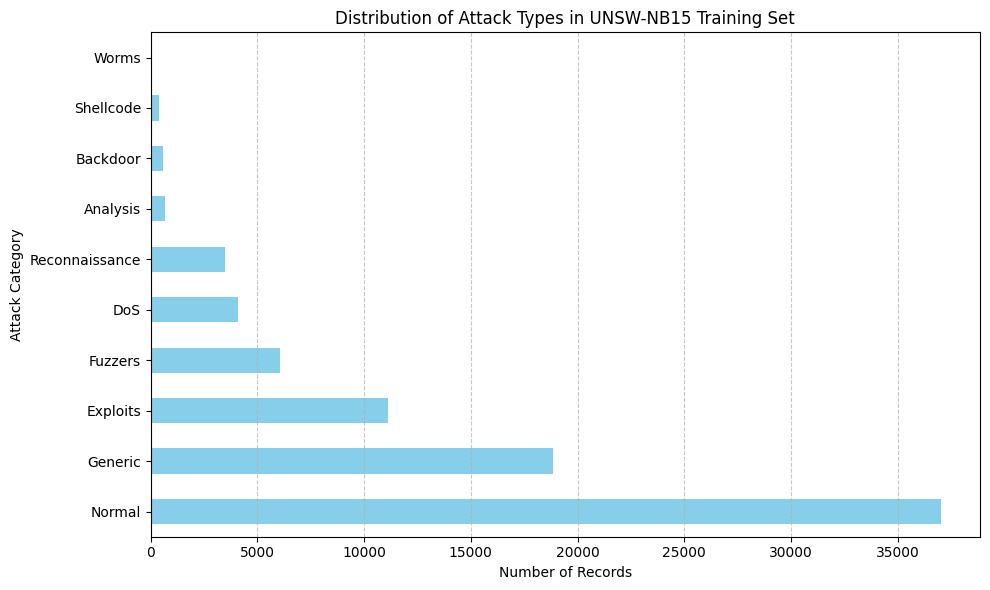

In [12]:
import os
import kagglehub
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Step 1: Download dataset
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")
print("Path to dataset files:", path)

# Step 2: Confirm available files (already done)
print("\nFiles in dataset directory:")
print(os.listdir(path))

# Step 3: Load training dataset
csv_file = os.path.join(path, "UNSW_NB15_training-set.csv")
df = pd.read_csv(csv_file)

# Step 4: Inspect dataset
print("\nInitial Dataset Info:")
print(df.info())
print(df.describe(include='all'))

# Step 5: Clean the data
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)
df = df[df['attack_cat'].notnull()]

# Step 6: Optional encoding
if 'proto' in df.columns and 'service' in df.columns:
    df = pd.get_dummies(df, columns=['proto', 'service'], drop_first=True)

print("\nCleaned Dataset Shape:", df.shape)
print("\nClass imbalance in attack categories:")
print(df['attack_cat'].value_counts(normalize=True).head())

# Step 7: Plot attack category distribution
attack_counts = df['attack_cat'].value_counts()

plt.figure(figsize=(10, 6))
attack_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Records')
plt.ylabel('Attack Category')
plt.title('Distribution of Attack Types in UNSW-NB15 Training Set')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Storytelling With Data Graph: 

I chose a horizontal bar chart similar to the one in the Storytelling With Data introduction that showed how values across categories can be compared visually. I recreated a similar chart using the attack_cat column from the UNSW-NB15 training set to show the distribution of different attack types.

What I tried:
- Used .value_counts() to count the attack categories
- Used .plot(kind='barh') to create a horizontal bar chart
- Added xlabel, ylabel, and title for clarity

Search terms I used:
“matplotlib horizontal bar chart”
“how to label axes matplotlib”
“pandas value_counts plot barh”